## Model Deployment

In [27]:
#pip install sklearn
#pip install flask
#pip install scikit-learn

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
!pip freeze > '/content/drive/MyDrive/ColabNotebooks/ML : Iris flower Classification/requirements.txt'

##### Build an ML model and deploy it using Flask

In [30]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [31]:
data = load_iris()
display(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [53]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['Target'])

display(x.head(5))
display(y.head(5))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20


,Target
0,0
1,0
2,0
3,0
4,0


In [33]:
print(x.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Target  150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB
None


In [34]:
display(x.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [35]:
x.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

sepal length (cm)       AxesSubplot(0.125,0.125;0.168478x0.755)
sepal width (cm)     AxesSubplot(0.327174,0.125;0.168478x0.755)
petal length (cm)    AxesSubplot(0.529348,0.125;0.168478x0.755)
petal width (cm)     AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

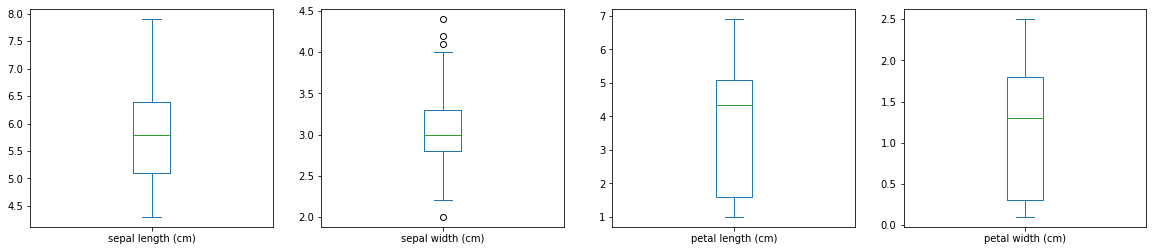

In [36]:
# Checking outliers
x.plot(kind='box', subplots=True, layout=(1,4), figsize=(20,4))

In [37]:
# Checking Outliers
new=pd.DataFrame({})
for i in x.columns:
    q1=x[i].quantile(0.25)
    q3=x[i].quantile(0.75)
    iqr=q3-q1
    lw=q1-(1.5 * iqr)
    uw=q3+(1.5 * iqr)
    mi=x[i].min()
    ma=x[i].max()
    out=0
    if (mi < lw or ma > uw):
        out=1
    new=new.append(
    {
        "i":i,
        "q1":q1,
        "q3":q3,
        "uw":uw,
        "lw":lw,
        "mi":mi,
        "ma":ma,
        "out":out
    }, ignore_index=True)
    
display(new)

,i,q1,q3,uw,lw,mi,ma,out
0,sepal length (cm),5.10,6.40,8.35,3.15,4.30,7.90,0.00
1,sepal width (cm),2.80,3.30,4.05,2.05,2.00,4.40,1.00
2,petal length (cm),1.60,5.10,10.35,-3.65,1.00,6.90,0.00
3,petal width (cm),0.30,1.80,4.05,-1.95,0.10,2.50,0.00


sepal length (cm)       AxesSubplot(0.125,0.125;0.168478x0.755)
sepal width (cm)     AxesSubplot(0.327174,0.125;0.168478x0.755)
petal length (cm)    AxesSubplot(0.529348,0.125;0.168478x0.755)
petal width (cm)     AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

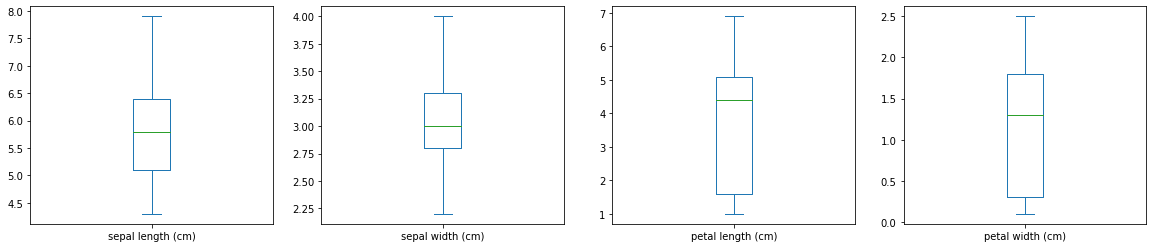

In [38]:
# Removal of Outliers
x1=x[x['sepal width (cm)']<4.05] 
x_new=x1[x1['sepal width (cm)']>2.0]

x_new.plot(kind='box', subplots=True, figsize=(20,4), layout=(1,4))

In [39]:
print(x_new.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  146 non-null    float64
 1   sepal width (cm)   146 non-null    float64
 2   petal length (cm)  146 non-null    float64
 3   petal width (cm)   146 non-null    float64
dtypes: float64(4)
memory usage: 5.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Target  150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB
None


In [40]:
data1=x_new.join(y)
display(data1.head(5))

data1.reset_index(inplace=True)
data2=data1.drop(['index'], axis=1)

display(data2.tail(5))
print(data2.info())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.10,3.50,1.40,0.20,0
1,4.90,3.00,1.40,0.20,0
2,4.70,3.20,1.30,0.20,0
3,4.60,3.10,1.50,0.20,0
4,5.00,3.60,1.40,0.20,0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
141,6.70,3.00,5.20,2.30,2
142,6.30,2.50,5.00,1.90,2
143,6.50,3.00,5.20,2.00,2
144,6.20,3.40,5.40,2.30,2
145,5.90,3.00,5.10,1.80,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  146 non-null    float64
 1   sepal width (cm)   146 non-null    float64
 2   petal length (cm)  146 non-null    float64
 3   petal width (cm)   146 non-null    float64
 4   Target             146 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.8 KB
None


In [41]:
# Splitting input and output
x9=pd.DataFrame(data2.drop(['Target'], axis=1))
y9=pd.DataFrame(data2['Target'])
display(x9.head(5))
display(y9.head(5))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20


,Target
0,0
1,0
2,0
3,0
4,0


In [42]:
y9.value_counts()
# So, we need to use classification models

Target
2         50
1         49
0         47
dtype: int64

In [43]:
# Splitting train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x9, y9, test_size=0.2, random_state=7, shuffle=True)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(116, 4) (116, 1) (30, 4) (30, 1)


In [44]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
model = LazyClassifier(verbose=0,ignore_warnings=True)
result, pred = model.fit(x_train, x_test, y_train, y_test)
display(result)

100%|██████████| 29/29 [00:01<00:00, 14.96it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.97,0.97,None,0.97,0.01
QuadraticDiscriminantAnalysis,0.97,0.96,None,0.97,0.02
LinearDiscriminantAnalysis,0.97,0.96,None,0.97,0.04
NuSVC,0.93,0.95,None,0.93,0.02
AdaBoostClassifier,0.93,0.94,None,0.93,0.41
LabelSpreading,0.93,0.94,None,0.93,0.04
XGBClassifier,0.93,0.94,None,0.93,0.03
RandomForestClassifier,0.93,0.94,None,0.93,0.41
LogisticRegression,0.93,0.94,None,0.93,0.03


##### Validating some models

In [46]:
from sklearn import metrics

In [47]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=int(10e5))
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


In [48]:
# K-Neighbour Classifier
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
model2=model

0.9666666666666667


In [49]:
# Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


In [50]:
# XGBoost Classifier
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe=Pipeline([('scaler', StandardScaler()),
              ('model', KNeighborsClassifier())])
pipe.fit(x_train, y_train)
y_pred=pipe.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

pipe=Pipeline([('model', KNeighborsClassifier())])
pipe.fit(x_train, y_train)
y_pred=pipe.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9
0.9666666666666667


In [52]:
import pickle
pickle.dump(model2, open('/content/drive/MyDrive/ColabNotebooks/ML : Iris flower Classification/modeldep.pkl', 'wb'))